In [19]:
from tensorboard.backend.event_processing import event_accumulator
frame_leakage = "lightning_logs/per_frame/leakage/events.out.tfevents.1761215733.n-62-20-16.3674439.0"
frame_no_leakage = "lightning_logs/per_frame/no_leakage/events.out.tfevents.1761237057.n-62-11-14.1796603.0"

leakage_ea = event_accumulator.EventAccumulator(frame_leakage)
no_leakage_ea = event_accumulator.EventAccumulator(frame_no_leakage)
leakage_ea.Reload()
no_leakage_ea.Reload()

In [20]:
from tensorboard.backend.event_processing import event_accumulator

def metric_from_ea(ea: event_accumulator.EventAccumulator, metric: str):
    """Extracts a metric from a TensorBoard event accumulator and returns it as a list of (step, value) tuples."""
    events = ea.Scalars(metric)
    return [event.step for event in events], [event.value for event in events]

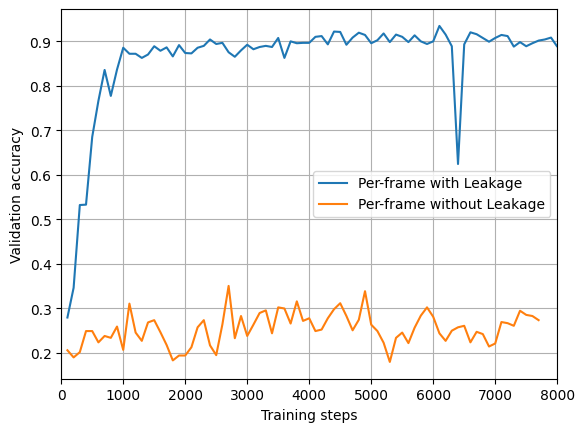

In [ ]:
import matplotlib.pyplot as plt

plt.plot(*metric_from_ea(leakage_ea, "val_accuracy"), label="Per-frame with Leakage")
plt.plot(*metric_from_ea(no_leakage_ea, "val_accuracy"), label="Per-frame without Leakage")
plt.xlim(0, 8000)
plt.xlabel("Training steps")
plt.ylabel("Validation accuracy")
plt.grid()
plt.legend()